In [1]:
library('readr')
library('dplyr')
library('reshape2')
library('ggplot2')
library('rgdal')
library('repr')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: sp
rgdal: version: 1.4-7, (SVN revision 845)
 Geospatial Data Abstraction Library extensions to R successfully loaded
 Loaded GDAL runtime: GDAL 2.4.3, released 2019/10/28
 Path to GDAL shared files: /usr/share/gdal
 GDAL binary built with GEOS: TRUE 
 Loaded PROJ.4 runtime: Rel. 6.2.1, November 1st, 2019, [PJ_VERSION: 620]
 Path to PROJ.4 shared files: (autodetected)
 Linking to sp version: 1.3-1 


In [2]:
source('common_stats_functions.r')

OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/data/GD_gregmaurer/droughtnet_precipsens_data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields


Regions defined for each Polygons


In [3]:
fname <- paste0(dn_path, 'sensitivity_analysis/fixed_randomDomain_effects.csv')

dom <- read_csv(fname)
head(dom)

Parsed with column specification:
cols(
  neonDomainName = col_character(),
  MAP = col_double(),
  MAT = col_double(),
  spei12mo_trend = col_double(),
  spei12mo_cv5yr_trend = col_double(),
  ndvi_prcp_Intcpt = col_double(),
  ndvi_prcp_Slope = col_double(),
  zndvi_prcp_Intcpt = col_double(),
  zndvi_prcp_Slope = col_double(),
  zndvi_spei_Intcpt = col_double(),
  zndvi_spei_Slope = col_double(),
  MAPdom = col_double(),
  MATdom = col_double(),
  spei12mo_trend_all = col_double(),
  spei12mo_cv5yr_trend_all = col_double()
)


neonDomainName,MAP,MAT,spei12mo_trend,spei12mo_cv5yr_trend,ndvi_prcp_Intcpt,ndvi_prcp_Slope,zndvi_prcp_Intcpt,zndvi_prcp_Slope,zndvi_spei_Intcpt,zndvi_spei_Slope,MAPdom,MATdom,spei12mo_trend_all,spei12mo_cv5yr_trend_all
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Appalachians / Cumberland Plateau,1229.8583,12.876123,2.640105e-04,-2.193997e-05,1.523425,-0.0004447813,1.25126637,-0.0031918669,-0.6730206,-1.4337369,1169.2229,12.564964,2.643023e-04,-2.199088e-05
Atlantic Neotropical,1502.0000,24.170295,-4.750003e-04,2.047066e-05,0.883240,-0.0003521494,-0.02203213,-0.0023277159,-0.2036000,-0.6563070,1491.3328,23.380670,-4.803523e-04,2.114857e-05
Central Plains,497.7514,12.285118,-9.022957e-05,2.109924e-05,-1.935213,0.0008730305,-3.39650714,0.0069627378,0.1885613,1.6487782,494.1643,11.554669,-9.058289e-05,2.109136e-05
Desert Southwest,225.0551,19.144803,-8.694542e-04,1.476098e-04,-2.839278,0.0009170556,-1.78918699,0.0126031203,4.3377347,4.2406899,245.7367,18.052197,-8.690439e-04,1.473590e-04
FixedEffects,NA,NA,NA,NA,5.558747,0.0005392970,-1.94772449,0.0037721184,0.7402265,1.3858123,NA,NA,NA,NA
Great Basin,308.4206,9.069863,-3.262137e-04,6.795495e-05,-1.577245,0.0002376465,0.72017901,0.0002978784,0.2635135,0.3043271,320.9593,8.297809,-3.250286e-04,6.755575e-05


In [4]:
dom2 <- dom

In [5]:
fixed <- dom2[5,6:11]
for (i in 1:dim(dom2)[1]){
    #print(i)
    dom2[i,6:11] <- dom2[i,6:11] + fixed
}


In [6]:
df <- dom2[c(1:4,6:18),c('neonDomainName','MAPdom', 'MATdom', 'ndvi_prcp_Slope', 'zndvi_spei_Slope')]
df$ndvi_prcp_Slope <- df$ndvi_prcp_Slope * 1000
df

neonDomainName,MAPdom,MATdom,ndvi_prcp_Slope,zndvi_spei_Slope
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Appalachians / Cumberland Plateau,1169.2229,12.564964,0.09451571,-0.047924517
Atlantic Neotropical,1491.3328,23.380670,0.18714757,0.729505367
Central Plains,494.1643,11.554669,1.41232749,3.034590556
Desert Southwest,245.7367,18.052197,1.45635260,5.626502229
Great Basin,320.9593,8.297809,0.77694343,1.690139429
Great Lakes,816.6060,6.732131,0.10796510,-0.003089592
Mid Atlantic,1140.3229,14.047997,0.16357645,0.184205491
Northeast,1035.8177,7.976203,-0.09438470,-0.231207749
Northern Plains,438.3639,6.080188,1.34675589,1.571764986


In [7]:
fname <- paste0(dn_path, 'USHCN_derived/allyr_ushcn_calcs_allstations.csv')

#classes <- gsub('logical','float', classes)
calcs <- read_csv(fname)
head(calcs)

Parsed with column specification:
cols(
  .default = col_double(),
  stationid = col_character(),
  elev = col_character(),
  state = col_character(),
  name = col_character(),
  flag1 = col_character(),
  flag2 = col_character(),
  flag3 = col_character()
)
See spec(...) for full column specifications.


stationid,latitude,longitude,elev,state,name,flag1,flag2,flag3,utcoffset,⋯,prcp_cv5yr_trend,prcp_cv5yr_trend_sig,spei12mo_trend,spei12mo_trend_sig,spei12mo_cv5yr_trend,spei12mo_cv5yr_trend_sig,spi12mo_trend,spi12mo_trend_sig,spi12mo_cv5yr_trend,spi12mo_cv5yr_trend_sig
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
USH00011084,31.0581,-87.0547,25.9,AL,BREWTON 3 SSE,------,------,------,6,⋯,-3.082635e-06,5.181877e-01,4.948660e-04,4.281059e-17,-5.418599e-05,1.450005e-23,3.475070e-04,4.515042e-09,-2.761315e-05,1.117645e-08
USH00012813,30.5467,-87.8808,7.0,AL,FAIRHOPE 2 NE,------,------,------,6,⋯,5.832594e-05,1.395250e-27,2.871429e-04,1.332174e-06,1.828267e-05,7.089053e-04,3.154710e-04,1.066194e-07,1.294170e-05,1.344355e-02
USH00013160,32.8347,-88.1342,38.1,AL,GAINESVILLE LOCK,011694,------,------,6,⋯,-1.006481e-04,1.951328e-83,2.030824e-04,6.633134e-04,-2.064144e-05,8.391407e-05,2.282740e-04,1.295231e-04,-3.163045e-05,8.261308e-10
USH00013511,32.7017,-87.5808,67.1,AL,GREENSBORO,------,------,------,6,⋯,-4.603313e-05,1.517411e-34,-5.681463e-06,9.233457e-01,-1.147154e-05,5.703395e-02,8.473712e-05,1.509880e-01,-2.727170e-05,4.638926e-06
USH00013816,31.8700,-86.2542,132.0,AL,HIGHLAND HOME,------,------,------,6,⋯,-4.880355e-05,4.188936e-25,3.157518e-04,1.032076e-07,-3.465651e-06,5.319998e-01,1.730071e-04,3.667829e-03,1.637979e-05,3.540241e-03
USH00015749,34.7442,-87.5997,164.6,AL,MUSCLE SHOALS AP,------,------,------,6,⋯,-1.990534e-05,5.019340e-05,4.272818e-04,1.014964e-12,1.449213e-06,8.349459e-01,5.983068e-04,7.816069e-24,-4.647953e-05,5.760756e-15


In [8]:
# Remove bad sites and calculate missing data
calcs$spei12mo_trend_scale <- calcs$spei12mo_trend
test <- calcs$spei12mo_trend_sig > 0.05
calcs$spei12mo_trend_scale[test] <- NA

# CV - this is is the 5 year rolling CV of 12 month SPEI plotted across the continental US
calcs$spei12mo_cv5yr_trend_scale <- calcs$spei12mo_cv5yr_trend
test <- calcs$spei12mo_cv5yr_trend_sig > 0.05
calcs$spei12mo_cv5yr_trend_scale[test] <- NA

In [9]:
dim(calcs)

# Assign NEON domain names to each stationid in the calcs dataframe
neonDomains <- readOGR("/home/greg/sftp/data/NEONdomains/","NEON_Domains")
neonDomains <- spTransform(neonDomains, CRS("+proj=longlat +datum=WGS84"))

neonDomains<- subset(neonDomains, DomainID!=18 & DomainID!=19 & 
                     DomainID!=20)
ushcnpoints <- SpatialPoints(calcs[,c('longitude', 'latitude')],
                             proj4string = CRS("+proj=longlat +datum=WGS84"))

pt.in.poly <- over(ushcnpoints, neonDomains, returnlist=TRUE)
calcs$neonDomainName <- pt.in.poly$DomainName
dim(calcs)

[1] 1218   30

OGR data source with driver: ESRI Shapefile 
Source: "/home/greg/sftp/data/NEONdomains", layer: "NEON_Domains"
with 22 features
It has 6 fields


[1] 1218   31

In [10]:
# for some reason some observations have no neon domain
# and are assigned NA. Remove them
dim(calcs)
calcs2 <- subset(calcs, !is.na(neonDomainName))
dim(calcs2)

[1] 1218   31

[1] 1208   31

In [11]:
calcs2$spei12mo_trend_scale <- (calcs2$spei12mo_trend_scale * 12 * calcs2$nyears)/10
calcs2$spei12mo_cv5yr_trend_scale <- (calcs2$spei12mo_cv5yr_trend_scale * 12 * calcs2$nyears)/10
out <- calcs2 %>% group_by(neonDomainName) %>%
    summarise(spei12mo_trend_scale=mean(spei12mo_trend_scale, na.rm=TRUE),
              spei12mo_cv5yr_trend_scale=mean(spei12mo_cv5yr_trend_scale, na.rm=TRUE))

In [12]:
out

neonDomainName,spei12mo_trend_scale,spei12mo_cv5yr_trend_scale
<fct>,<dbl>,<dbl>
Appalachians / Cumberland Plateau,0.052921377,-0.003551187
Atlantic Neotropical,-0.067803496,0.002968371
Central Plains,-0.019304661,0.003834096
Desert Southwest,-0.129484582,0.021448645
Great Basin,-0.061047741,0.010919175
Great Lakes,0.033527011,-0.003742819
Mid Atlantic,-0.013820239,0.007773787
Northeast,0.039714018,-0.000939747
Northern Plains,-0.002234935,0.004561564


In [13]:
library('forcats')
df <- merge(df, out, by='neonDomainName', all=TRUE)
colnames(df) <- c('Domain', 'MAP', 'MAT', 'NPP_Precip', 'NPP_SPEI', 'SPEI_trend', 'SPEI_CV_trend')
df <- transform(df, Domain=reorder(Domain, MAP))
df <- df %>% mutate(Domain = fct_recode(Domain,
            "S Rockies/Col. Plat." = "Southern Rockies / Colorado Plateau",
            "Applachians/C. Plat." = "Appalachians / Cumberland Plateau"))

df_out <- df
colnames(df_out) <- c('Domain', 'MAP', 'MAT', 'NPP:Precip', 'NPP:SPEI', 'SPEI trend', 'SPEI CV trend')

In [14]:
df_out[order(df_out$Domain),]

write_csv(df_out[order(df_out$Domain),], paste0(dn_path, 'sensitivity_analysis/ecoregion_risk_table.csv'))

,Domain,MAP,MAT,NPP:Precip,NPP:SPEI,SPEI trend,SPEI CV trend
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,Desert Southwest,245.7367,18.052197,1.45635260,5.626502229,-0.129484582,0.021448645
5,Great Basin,320.9593,8.297809,0.77694343,1.690139429,-0.061047741,0.010919175
17,S Rockies/Col. Plat.,328.9915,9.130984,1.01437360,2.726249165,-0.062419230,0.010578045
9,Northern Plains,438.3639,6.080188,1.34675589,1.571764986,-0.002234935,0.004561564
10,Northern Rockies,444.7923,5.451894,0.70514926,0.482933306,-0.021883682,0.005479932
3,Central Plains,494.1643,11.554669,1.41232749,3.034590556,-0.019304661,0.003834096
13,Pacific Southwest,593.5586,14.895990,0.38088306,2.333301508,-0.067710422,0.017910538
16,Southern Plains,753.6716,17.735482,1.02995585,4.506094258,0.046716450,-0.002216100
6,Great Lakes,816.6060,6.732131,0.10796510,-0.003089592,0.033527011,-0.003742819


In [15]:
# Reorder dataframe by MAP
df2 <- df

# Also get a color scheme for domains sorted by map
library('RColorBrewer')
cols <- colorRampPalette(brewer.pal(11,"Spectral"))
myPal <- cols(17)

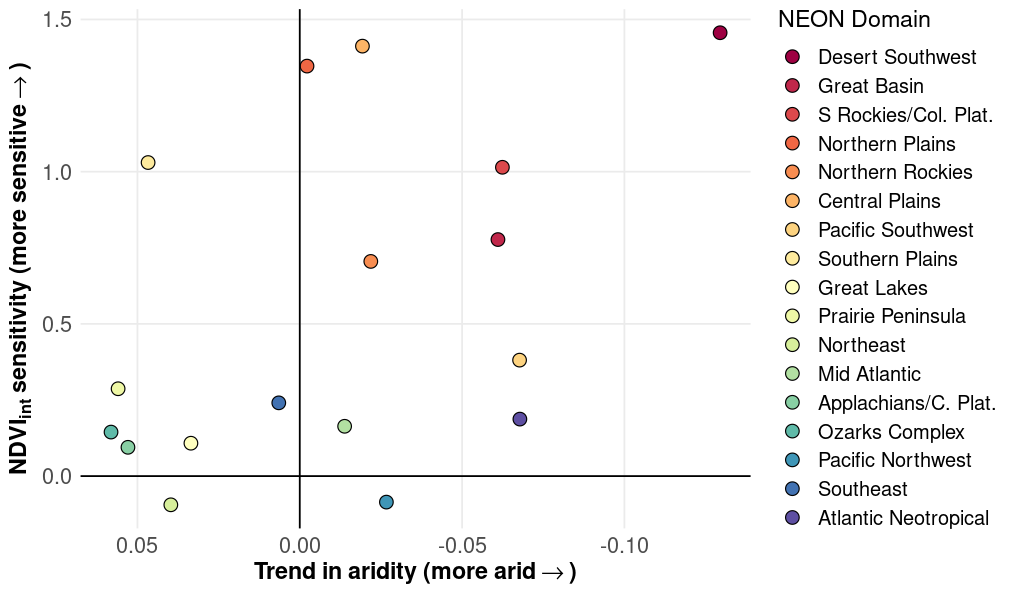

In [16]:
options(repr.plot.width=8.5, repr.plot.height=5)

ggplot(df2, aes(SPEI_trend, NPP_Precip)) +
    geom_point(aes(fill=Domain), shape=21, col='black', size=3.5) +
    scale_fill_manual(values=myPal) +
    scale_x_reverse() + 
    theme_minimal() + theme(panel.grid.minor=element_blank(),axis.text=element_text(size=13),
                            axis.title=element_text(size=14,face="bold"),
                            legend.title=element_text(size=14),legend.text=element_text(size=12)) +
    guides(fill=guide_legend(title='NEON Domain')) +
    xlab(expression(bold("Trend in aridity (more arid" %->% ")"))) + ylab(expression(bold(NDVI[int]*" sensitivity (more sensitive" %->% ")"))) +
    #geom_text(aes(label=Domain),hjust=0, vjust=0) +
    geom_vline(xintercept = 0) + geom_hline(yintercept = 0)

ggsave('../figs/NPP_precip_risk.pdf', width=8, height=5)
ggsave('../figs/NPP_precip_risk.png', width=8, height=5, dpi=600)